 ## <center> MolSim Final Project
 <center> Kaylyn Torkelson

In [1]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

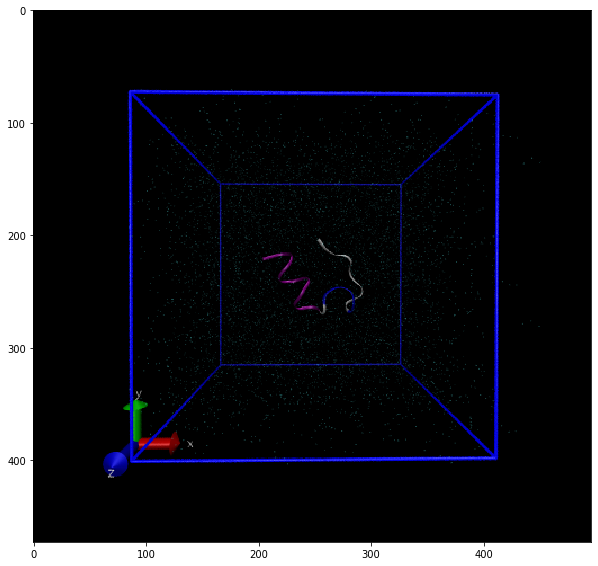

In [2]:
## Task 1: Set-Up System

start = mpimg.imread('START.bmp') 
plt.figure(figsize=(10,10))
plt.imshow(start)

In [3]:
# Reading text from GROMACS xvg outputs for plotting

potential = np.loadtxt('potential.xvg',skiprows=24)

tempequil = np.loadtxt('temperatureequil.xvg',skiprows=30)
pressequil = np.loadtxt('pressureequil.xvg',skiprows=30)

NVT273temp = np.loadtxt('temp_273_nvt.xvg',skiprows=30)
NVT500temp = np.loadtxt('temp_500_nvt.xvg',skiprows=30)
NVT273pres = np.loadtxt('pressure_273_nvt.xvg',skiprows=30)
NVT500pres = np.loadtxt('pressure_500_nvt.xvg',skiprows=30)

NVT273rmsd = np.loadtxt('calpha_273.xvg',skiprows=24)
NVT500rmsd = np.loadtxt('calpha_500.xvg',skiprows=24)

NVT273dens = np.loadtxt('density_273.xvg',skiprows=24)
NVT500dens = np.loadtxt('density_500.xvg',skiprows=24)

Text(0.5, 1.0, 'Energy Minimization')

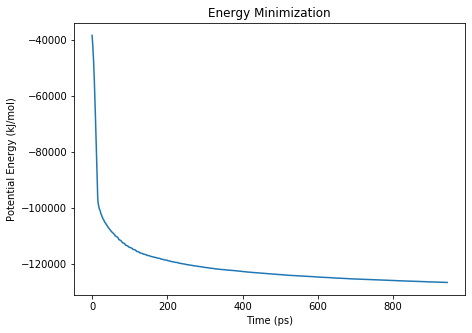

In [4]:
## Task 2: Energy Minimization and NPT Equilibration

# Energy Minimization
# If the energy minimization step works, the potential energy of the system should decrease over time.

plt.figure(figsize=(7,5))
plt.plot(potential[:,0],potential[:,1])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kJ/mol)')
plt.title('Energy Minimization')

Text(0.5, 1.0, 'NPT Equilibration Pressure')

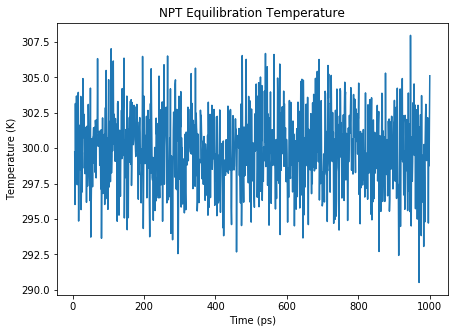

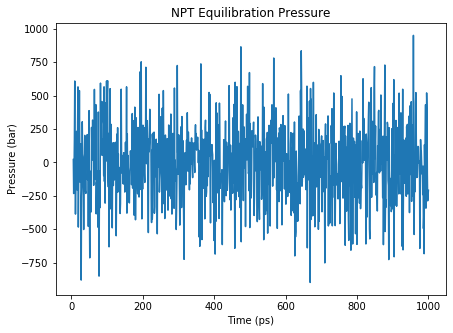

In [5]:
# NPT Equilibration Temperature

plt.figure(figsize=(7,5))
plt.plot(tempequil[:,0],tempequil[:,1])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('NPT Equilibration Temperature')

# NPT Equilibration Pressure

plt.figure(figsize=(7,5))
plt.plot(pressequil[:,0],pressequil[:,1])
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.title('NPT Equilibration Pressure')

During the equilibration step, both the temperature and the pressure oscillate around their respective set values to show that those values were reached. I'm not sure how to interpret the pressure oscillations into the negatives but figure that might just be something that happens in simulations even though it physically doesn't make sense.

Text(0.5, 1.0, 'Parallel Computing: Scaling Plot')

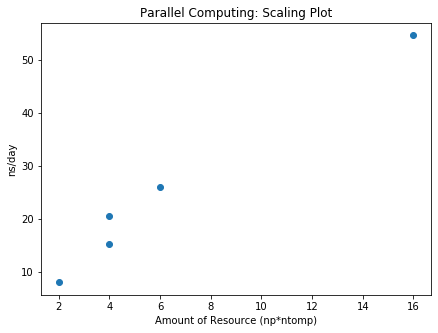

In [6]:
## Task 3: Parallel Computing

# I had my step size for these simulations set as 0.001 instead of 0.002 so that might be why my ns/day numbers are lower.

resource = np.array([2, 4, 6, 4, 16])
nsday = np.array([8.096, 15.363, 26.053, 20.547, 54.616])
plt.figure(figsize=(7,5))
plt.scatter(resource, nsday)
plt.xlabel('Amount of Resource (np*ntomp)')
plt.ylabel('ns/day')
plt.title('Parallel Computing: Scaling Plot')

The next simulations in this project were run using -np 4 -ntomp 4 because that amount of resource produced the largest number of ns/day in this scaling analysis.

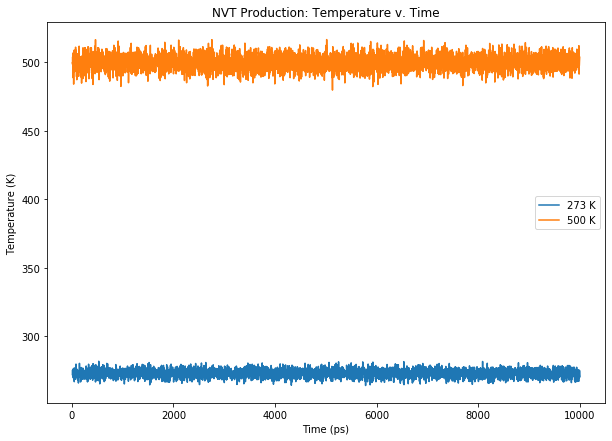

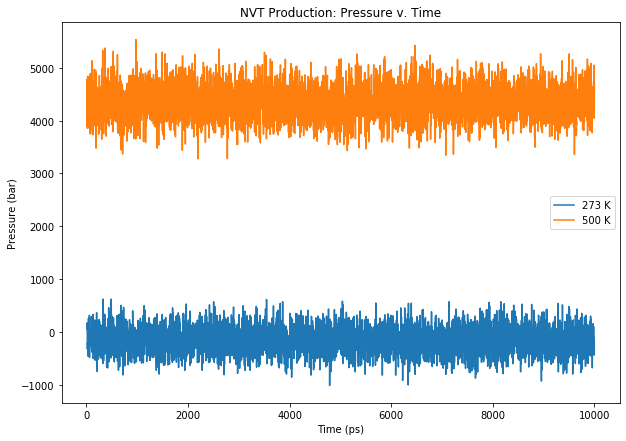

In [7]:
## Task 4: Trajectory Analysis

# NVT Production Temperature v. Time

plt.figure(figsize=(10,7))
plt.plot(NVT273temp[:,0],NVT273temp[:,1], label='273 K')
plt.plot(NVT500temp[:,0],NVT500temp[:,1], label='500 K')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('NVT Production: Temperature v. Time')
plt.legend()

# NVT Production Pressure v. Time

plt.figure(figsize=(10,7))
plt.plot(NVT273pres[:,0],NVT273pres[:,1], label='273 K')
plt.plot(NVT500pres[:,0],NVT500pres[:,1], label='500 K')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.title('NVT Production: Pressure v. Time')
plt.legend()

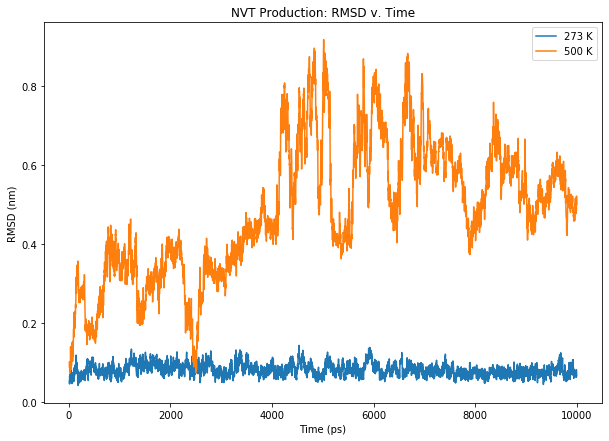

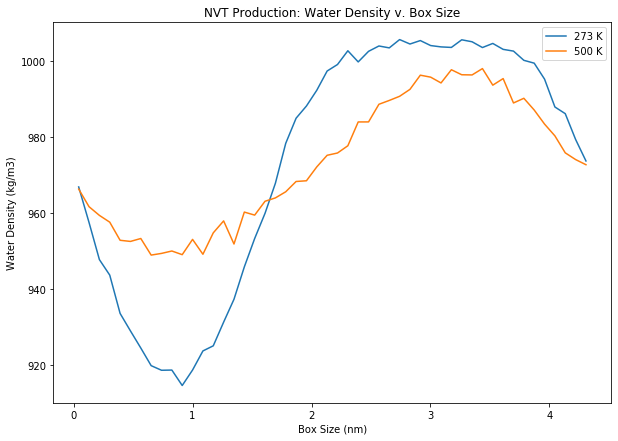

In [8]:
# NVT Production RMSD v. Time

plt.figure(figsize=(10,7))
plt.plot(NVT273rmsd[:,0],NVT273rmsd[:,1], label='273 K')
plt.plot(NVT500rmsd[:,0],NVT500rmsd[:,1], label='500 K')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (nm)')
plt.title('NVT Production: RMSD v. Time')
plt.legend()

# NVT Production Water Density v. Box Size

plt.figure(figsize=(10,7))
plt.plot(NVT273dens[:,0],NVT273dens[:,1], label='273 K')
plt.plot(NVT500dens[:,0],NVT500dens[:,1], label='500 K')
plt.xlabel('Box Size (nm)')
plt.ylabel('Water Density (kg/m3)')
plt.title('NVT Production: Water Density v. Box Size')
plt.legend()

The results for temperature here make sense; as each simulation progresses, they oscillate around their set temperature. The pressure of each simulation also oscillates around a specific temperature, with the higher temperature simulation also at a higher pressure.

The RMSD changes more in the higher temperature NVT simulation which makes sense, but I was expecting it to flatten out at a certain point and oscillate around one value as the simulation progressed.

I'm not sure how to interpret the water density v. box size plot. The lower temperature run has more variation in water density but it seems that both temperatures exhibit similar trends with the peaks/troughs in the same areas of the box. It might have something to do with the placement of the protein within the box (?).

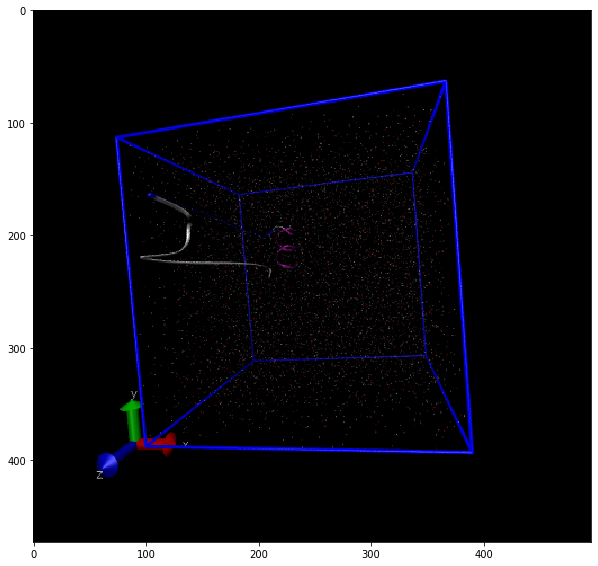

In [9]:
## Task 5: VMD/Visualization

# Final Frame of 273 K NVT Production Run

NVT_273 = mpimg.imread('273.bmp') 
plt.figure(figsize=(10,10))
plt.imshow(NVT_273)

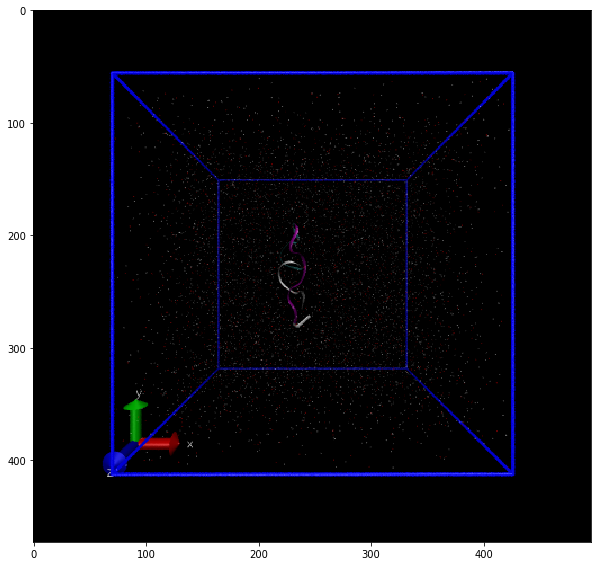

In [10]:
# Final Frame of 500 K NVT Production Run

NVT_500 = mpimg.imread('500.bmp')
plt.figure(figsize=(10,10))
plt.imshow(NVT_500)